In [14]:
import sys
sys.path.append("..")
import numpy as np
import nn_classifiers as nc
from data_generation import generate_quantile_data

## Generate Dataset

In [78]:
d = 2
k = 5
n = 10000
portions = np.cumsum(np.array([4]*5))

X_train, y_train = generate_quantile_data(d, k, n, portions)
X_test, y_test = generate_quantile_data(d, k, n, portions)

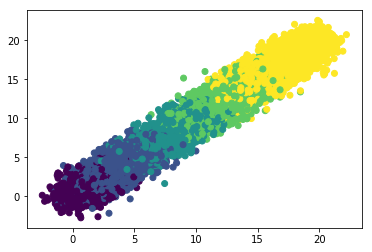

In [79]:
from matplotlib import pyplot as plt
plt.scatter([X_train[:, 0]], [X_train[:, 1]], c=[y_train])

## Set Up Neural Net

In [592]:
nn_clf = nc.NeuralNetQuantile(gamma=0.5, max_iter=10000, 
                 surrogate_type='AT', loss_function='hinge')

In [593]:
nn_clf.fit(X_train, y_train)

Epoch 1/1
10000/10000 [==============================] - 5s 490us/step
Epoch 1/1
10000/10000 [==============================] - 5s 534us/step
Epoch 1/1
10000/10000 [==============================] - 6s 608us/step
Epoch 1/1
10000/10000 [==============================] - 5s 512us/step
Epoch 1/1
10000/10000 [==============================] - 5s 545us/step


In [587]:
nn_clf.predict(X_test)

matrix([[1.],
        [2.],
        [1.],
        ...,
        [2.],
        [3.],
        [3.]])

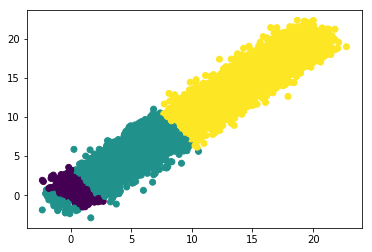

In [594]:
plt.scatter([X_test[:, 0]], [X_test[:, 1]], c=[nn_clf.predict(X_test)])